<a href="https://colab.research.google.com/github/Elsiekiprop/Sales-Prediction--Time-Series-Models/blob/Elsie-K/Copy_of_Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Store Sales - Time Series Forecasting.
## Overview
This project aims to predict sales of various products at Favorita stores in Ecuador.
## Business Understanding

## Data Understanding.

Seven data sets will be used in this project. The data sets are as follows:

**Train.csv**
This data set includes data on:
- date: day the sale occured
- id: the sales id
- store_nbr: the store at which the sale occured
- sales: total sales for a given product family at a given store at a given date.
- onpromotion: total  number of items promoted at a given store at a given date.

The  **test.csv** file contains data similar to the training data. The data contains sales information collected 15 days after the train data.


**Oil.csv**

This file contains details on oil prices since Ecuador's economy heavily depends on Oil


**Stores.csv**

This file includes information on store location:
- city: the city a state is located
- state: the state a city is located
- cluster: a group of similar stores
- type: the type of store




# Importing necessary libraries.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Common Functions

# Data Access and Collection

In [3]:
path_var = '/content/drive/MyDrive/store-sales-time-series-forecasting'

In [4]:
#Reading data
train_df=pd.read_csv(path_var + "/train.csv")
test_df=pd.read_csv(path_var + "/test.csv")
oil_df=pd.read_csv(path_var + "/oil.csv")
sample_submission_df=pd.read_csv(path_var + "/sample_submission.csv")
stores_df=pd.read_csv(path_var + "/stores.csv")
transactions_df=pd.read_csv(path_var + "/transactions.csv")
holidays_events_df=pd.read_csv(path_var + "/holidays_events.csv")

#### Merging the data sets

In [5]:
#Trying to merge data
train_data=pd.merge(train_df,holidays_events_df,on='date',how='left')
train_data=pd.merge(train_data,oil_df,on='date',how='left')
train_data=pd.merge(train_data,stores_df,on='store_nbr',how='left')
train_data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   type_x       object 
 7   locale       object 
 8   locale_name  object 
 9   description  object 
 10  transferred  object 
 11  dcoilwtico   float64
 12  city         object 
 13  state        object 
 14  type_y       object 
 15  cluster      int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 396.1+ MB


In [6]:
train_data.isnull().sum()


id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
type_x         2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dcoilwtico      955152
city                 0
state                0
type_y               0
cluster              0
dtype: int64

In [7]:
#Step to be discussed further
df_train=train_data.dropna()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322542 entries, 73062 to 3054347
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           322542 non-null  int64  
 1   date         322542 non-null  object 
 2   store_nbr    322542 non-null  int64  
 3   family       322542 non-null  object 
 4   sales        322542 non-null  float64
 5   onpromotion  322542 non-null  int64  
 6   type_x       322542 non-null  object 
 7   locale       322542 non-null  object 
 8   locale_name  322542 non-null  object 
 9   description  322542 non-null  object 
 10  transferred  322542 non-null  object 
 11  dcoilwtico   322542 non-null  float64
 12  city         322542 non-null  object 
 13  state        322542 non-null  object 
 14  type_y       322542 non-null  object 
 15  cluster      322542 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 41.8+ MB


# Data Cleaning


*   Check on how to clean TimeSeries data
*   Filling in values for TimeSeries data
> NB Change date column into index.




### Cleaning the train data set
#### Checking for unique features of the data (nature of data)

In [8]:
#info
#train_df.info()

The data has 3000888 rows and 5 variables.


In [9]:
#Checking for missing vales
#train_df.isnull().sum()

The data has no missing values.

We can change the the date column to date time



In [10]:
#Changing data type of the date column
df_train['date']=pd.to_datetime(df_train['date'])
df_train.info()


<ipython-input-10-b7dc623d4b88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['date']=pd.to_datetime(df_train['date'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 322542 entries, 73062 to 3054347
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           322542 non-null  int64         
 1   date         322542 non-null  datetime64[ns]
 2   store_nbr    322542 non-null  int64         
 3   family       322542 non-null  object        
 4   sales        322542 non-null  float64       
 5   onpromotion  322542 non-null  int64         
 6   type_x       322542 non-null  object        
 7   locale       322542 non-null  object        
 8   locale_name  322542 non-null  object        
 9   description  322542 non-null  object        
 10  transferred  322542 non-null  object        
 11  dcoilwtico   322542 non-null  float64       
 12  city         322542 non-null  object        
 13  state        322542 non-null  object        
 14  type_y       322542 non-null  object        
 15  cluster      322542 non-null 

## Stationarity
Stationarity means that:

1. Mean is constant and not time dependent
2. Constant variance that's not time dependent
3. Constant covariance thats not time dependent


Text(0, 0.5, 'Sales')

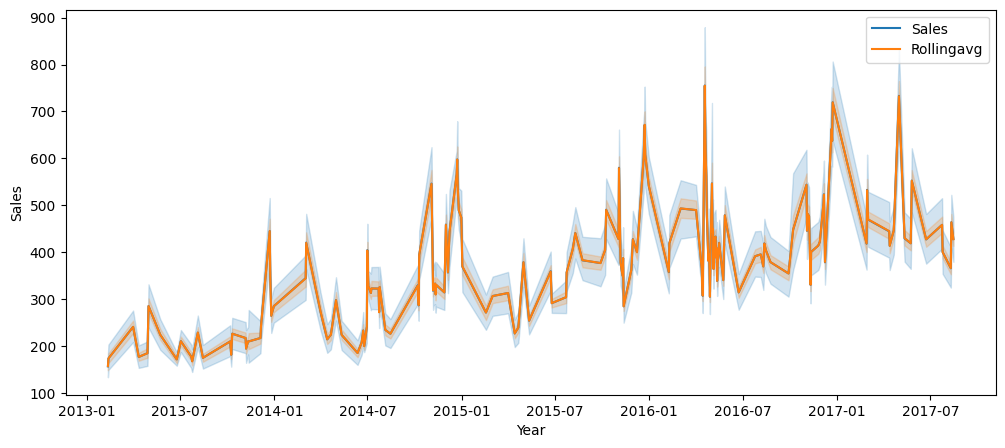

In [11]:
rolling_window = 12
# set figure size
plt.figure( figsize = ( 12, 5))

# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'date',
			y = 'sales',
			data = df_train,
			label = 'Sales')

# plot using rolling average
sns.lineplot( x = 'date',
			y = df_train['sales'].rolling(rolling_window).mean(),
			data = df_train,
			label = 'Rollingavg')

plt.xlabel('Year')



plt.ylabel('Sales')


## Checking for Stationarity
One of the ways that we can check for stationarity is splitting our data and calculating mean of the two sets . Ideally the two sets should have similar means. If they are different then the time series is non stationary.



In [12]:


from statsmodels.tsa.stattools import kpss
result = kpss(df_train['sales'] )
result

<ipython-input-12-5f8082fd1876>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df_train['sales'] )


(28.104174438203874,
 0.01,
 173,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [13]:
from statsmodels.tsa.stattools import kpss
def kpss_test(data, **kw):
    statistic, p_value, n_lags, critical_values = kpss(data , **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df_train.sales)

KPSS Statistic: 28.104174438203874
p-value: 0.01
num lags: 173
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


<ipython-input-13-c259b0d4bb9d>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(data , **kw)


From the KPSS Test above, the p-value is less that 0.05. This is an indicator that the data is not stationary hence the need to correct it.

## Correcting stationarity

We can carry out differencing to the data .

In [14]:
#train_df['sales']=np.log(train_df['sales'])


In [15]:
ts_diff = np.diff(df_train['sales'])
df_train['sales'] = np.append([0], ts_diff)

<ipython-input-15-5e137bb64a37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['sales'] = np.append([0], ts_diff)


## Autocorrelation
Autocorelation is the similarity of a time series and a lagged version of itself. After differencing, ACF and PACF plots are important to determining whether MA and AR are needed to correct for any autocorelation left in the differenced series.

In [16]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
73062,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
73063,73063,2013-02-11,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
73064,73064,2013-02-11,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
73065,73065,2013-02-11,1,BEVERAGES,172.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
73066,73066,2013-02-11,1,BOOKS,-172.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13


In [17]:
#Changing the date to index
df_train= df_train.set_index('date')
df_train.head()

,id,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
date,,,,,,,,,,,,,,,
2013-02-11,73062,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
2013-02-11,73063,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
2013-02-11,73064,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
2013-02-11,73065,1,BEVERAGES,172.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
2013-02-11,73066,1,BOOKS,-172.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13


In [18]:
#Downsampling data for easy running of code
df_train['sales']= df_train['sales'].resample('D').mean()


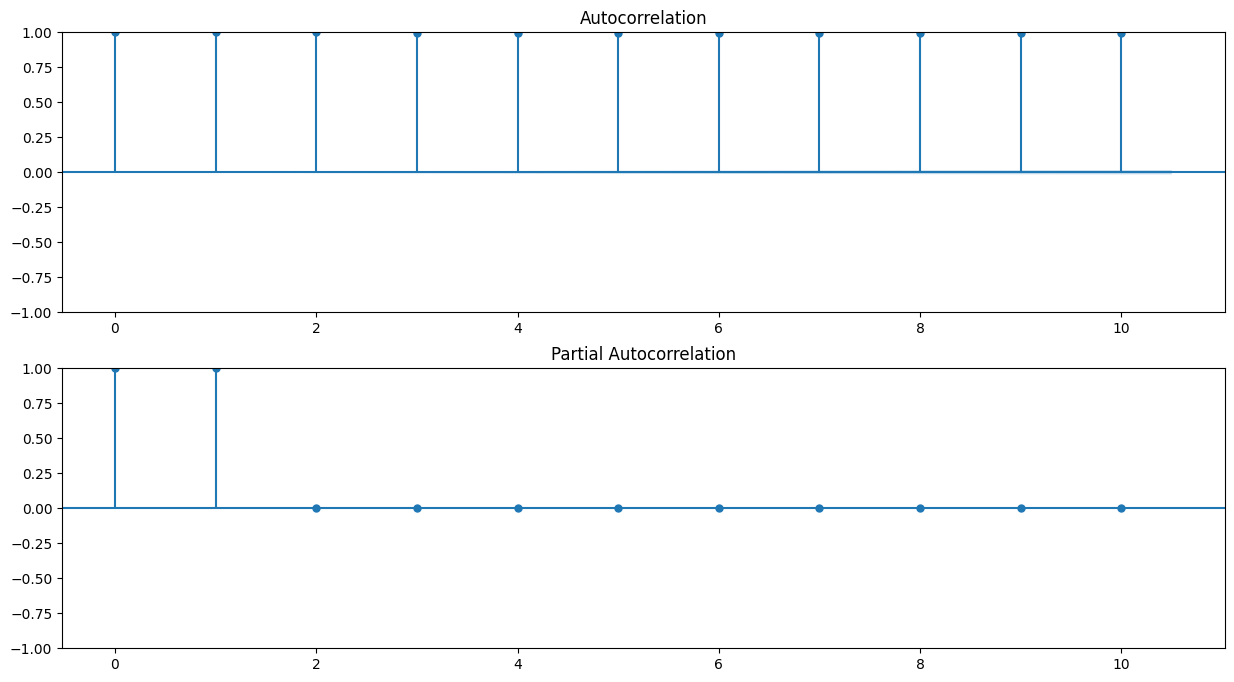

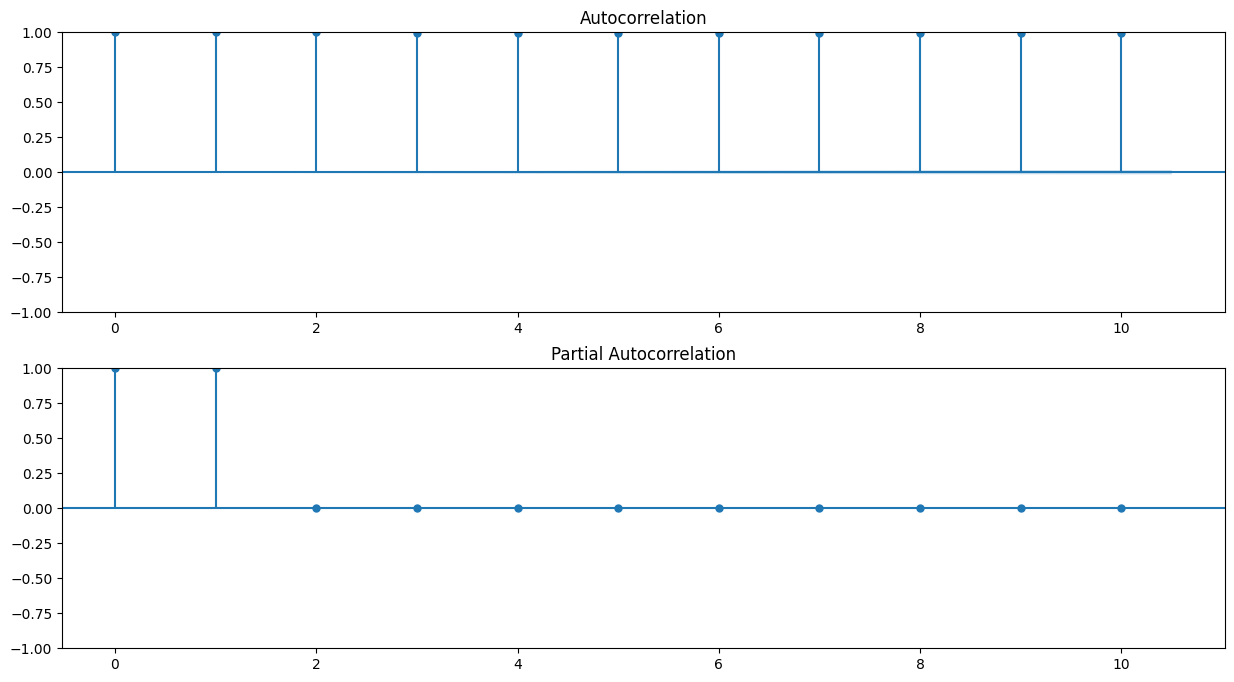

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,8))
plot_acf(df_train.sales,lags=10,ax=ax[0])
plot_pacf(df_train.sales,lags=10,ax=ax[1])


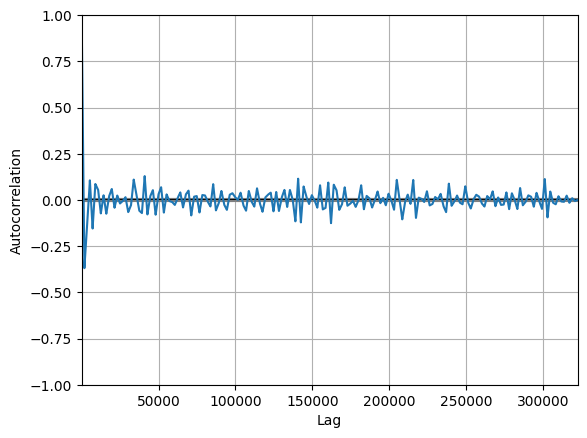

In [20]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_train['sales'])
plt.show()

# EDA

## Check for ACF and PACF

# Model Building and Training
Proposed models:
*   Prophet
*   Arma
*   ARIMA
*   SARIMA







# Model Evaluation

Check for accuracy of models

# Deploy Model

Ref: https://colab.research.google.com/drive/15PBqTZELcx73TdXUpsN7TVHOp-x6R7EU#scrollTo=j8-Bzga1LWOn